In [31]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import seaborn as sn
drRatings = pd.read_excel('/Users/navneetkaurtirth/Desktop/Social Media Analytics/Assignment 1/OBGYN_new_train_80000.xlsx')
#shuffle the data so that they are in random sequence
drRatings = drRatings.sample(frac=1)
drRatings['highKnowledge'] = (drRatings['knowledge']>4).astype(int)


In [32]:
drRatings

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highKnowledge
38197,38198,147082,Dr. Sandra Nagler,Gynecologist (OBGYN),35,North Reading,MA,/doctor-ratings/147082/Dr-Sandra-Nagler-North%...,3.25,5,3,1,4,2014-06-06 15:42:00,I had been a patient of Dr nangler's for a lit...,1,0
31202,31203,546610,Dr. Joyce A. Bonsu,Gynecologist (OBGYN),7,Baltimore,MD,/doctor-ratings/546610/Dr-Joyce%2BA.-Bonsu-Bal...,4.25,5,2,5,5,2015-02-17 05:40:00,"Excellent bedside manner, very sweet and reass...",1,1
77588,77589,152300,Dr. Stratton N. Sterghos,Gynecologist (OBGYN),1,Plantation,FL,/doctor-ratings/152300/Dr-Stratton%2BN.-Stergh...,2.50,4,4,1,1,2011-03-15 14:47:00,Dealing with Dr Sterghos Jr turned into one of...,0,0
78050,78051,37793,Dr. Paula F. Nadell,Gynecologist (OBGYN),22,Phoenix,AZ,/doctor-ratings/37793/Dr-Paula%2BF.-Nadell-Pho...,1.00,1,1,1,1,2011-12-21 11:22:00,This has got to be the rudest doctor ever. I'v...,0,0
1573,1574,29417,Dr. Michelle E. Webster,Gynecologist (OBGYN),23,Oklahoma City,OK,/doctor-ratings/29417/Dr-Michelle%2BE.-Webster...,1.50,1,2,1,2,2015-03-18 16:19:00,We have been having billing issues with this o...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76289,76290,2463606,Dr. James G. Johnson,Gynecologist (OBGYN),1,GREENVILLE,SC,/doctor-ratings/2463606/Dr-JAMES%2BG.-JOHNSON-...,5.00,5,5,5,5,2013-02-27 20:45:00,Dr. Johnson has been my gynecologist for many ...,0,1
70524,70525,302111,Dr. Mark P. Hyde,Gynecologist (OBGYN),9,Richmond,VA,/doctor-ratings/302111/Dr-Mark%2BP.-Hyde-Richm...,2.00,3,3,1,1,2010-01-02 22:50:00,His lack of empathy was appalling. He was insu...,0,0
64292,64293,155525,Dr. Jean M Moon,Gynecologist (OBGYN),4,Scottsdale,AZ,/doctor-ratings/155525/Dr-Jean%2BM-Moon-Scotts...,5.00,5,5,5,5,2008-11-19 15:24:00,"Dr. Moon was awesome during my pregnancy, labo...",0,1
11952,11953,884082,Dr. Karen G. Raiford,Gynecologist (OBGYN),27,Huntsville,AL,/doctor-ratings/884082/Dr-Karen%2BG.-Raiford-H...,2.00,1,3,2,2,2011-06-08 10:16:00,Dr. Raiford has been rude to me on numerous oc...,0,0


In [33]:
temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
del temp
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['hour']=drRatings['postedTime'].dt.hour


In [34]:
drRatings

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,...,UT,VA,VT,WA,WB,WI,WV,WY,year,hour
38197,38198,147082,Dr. Sandra Nagler,Gynecologist (OBGYN),35,North Reading,MA,/doctor-ratings/147082/Dr-Sandra-Nagler-North%...,3.25,5,...,0,0,0,0,0,0,0,0,2014,15
31202,31203,546610,Dr. Joyce A. Bonsu,Gynecologist (OBGYN),7,Baltimore,MD,/doctor-ratings/546610/Dr-Joyce%2BA.-Bonsu-Bal...,4.25,5,...,0,0,0,0,0,0,0,0,2015,5
77588,77589,152300,Dr. Stratton N. Sterghos,Gynecologist (OBGYN),1,Plantation,FL,/doctor-ratings/152300/Dr-Stratton%2BN.-Stergh...,2.50,4,...,0,0,0,0,0,0,0,0,2011,14
78050,78051,37793,Dr. Paula F. Nadell,Gynecologist (OBGYN),22,Phoenix,AZ,/doctor-ratings/37793/Dr-Paula%2BF.-Nadell-Pho...,1.00,1,...,0,0,0,0,0,0,0,0,2011,11
1573,1574,29417,Dr. Michelle E. Webster,Gynecologist (OBGYN),23,Oklahoma City,OK,/doctor-ratings/29417/Dr-Michelle%2BE.-Webster...,1.50,1,...,0,0,0,0,0,0,0,0,2015,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76289,76290,2463606,Dr. James G. Johnson,Gynecologist (OBGYN),1,GREENVILLE,SC,/doctor-ratings/2463606/Dr-JAMES%2BG.-JOHNSON-...,5.00,5,...,0,0,0,0,0,0,0,0,2013,20
70524,70525,302111,Dr. Mark P. Hyde,Gynecologist (OBGYN),9,Richmond,VA,/doctor-ratings/302111/Dr-Mark%2BP.-Hyde-Richm...,2.00,3,...,0,1,0,0,0,0,0,0,2010,22
64292,64293,155525,Dr. Jean M Moon,Gynecologist (OBGYN),4,Scottsdale,AZ,/doctor-ratings/155525/Dr-Jean%2BM-Moon-Scotts...,5.00,5,...,0,0,0,0,0,0,0,0,2008,15
11952,11953,884082,Dr. Karen G. Raiford,Gynecologist (OBGYN),27,Huntsville,AL,/doctor-ratings/884082/Dr-Karen%2BG.-Raiford-H...,2.00,1,...,0,0,0,0,0,0,0,0,2011,10


In [35]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [36]:
drRatings

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,...,UT,VA,VT,WA,WB,WI,WV,WY,year,hour
38197,38198,147082,Dr. Sandra Nagler,Gynecologist (OBGYN),35,North Reading,MA,/doctor-ratings/147082/Dr-Sandra-Nagler-North%...,3.25,5,...,0,0,0,0,0,0,0,0,2014,15
31202,31203,546610,Dr. Joyce A. Bonsu,Gynecologist (OBGYN),7,Baltimore,MD,/doctor-ratings/546610/Dr-Joyce%2BA.-Bonsu-Bal...,4.25,5,...,0,0,0,0,0,0,0,0,2015,5
77588,77589,152300,Dr. Stratton N. Sterghos,Gynecologist (OBGYN),1,Plantation,FL,/doctor-ratings/152300/Dr-Stratton%2BN.-Stergh...,2.50,4,...,0,0,0,0,0,0,0,0,2011,14
78050,78051,37793,Dr. Paula F. Nadell,Gynecologist (OBGYN),22,Phoenix,AZ,/doctor-ratings/37793/Dr-Paula%2BF.-Nadell-Pho...,1.00,1,...,0,0,0,0,0,0,0,0,2011,11
1573,1574,29417,Dr. Michelle E. Webster,Gynecologist (OBGYN),23,Oklahoma City,OK,/doctor-ratings/29417/Dr-Michelle%2BE.-Webster...,1.50,1,...,0,0,0,0,0,0,0,0,2015,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76289,76290,2463606,Dr. James G. Johnson,Gynecologist (OBGYN),1,GREENVILLE,SC,/doctor-ratings/2463606/Dr-JAMES%2BG.-JOHNSON-...,5.00,5,...,0,0,0,0,0,0,0,0,2013,20
70524,70525,302111,Dr. Mark P. Hyde,Gynecologist (OBGYN),9,Richmond,VA,/doctor-ratings/302111/Dr-Mark%2BP.-Hyde-Richm...,2.00,3,...,0,1,0,0,0,0,0,0,2010,22
64292,64293,155525,Dr. Jean M Moon,Gynecologist (OBGYN),4,Scottsdale,AZ,/doctor-ratings/155525/Dr-Jean%2BM-Moon-Scotts...,5.00,5,...,0,0,0,0,0,0,0,0,2008,15
11952,11953,884082,Dr. Karen G. Raiford,Gynecologist (OBGYN),27,Huntsville,AL,/doctor-ratings/884082/Dr-Karen%2BG.-Raiford-H...,2.00,1,...,0,0,0,0,0,0,0,0,2011,10


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["dr", "doctor"] + list(stop_words)

def calTFIDF(texts,max_features=None):
  vectorizer = TfidfVectorizer(max_features=max_features,lowercase=True,stop_words=stop_words,ngram_range=(1,1))
  TFIDF = vectorizer.fit_transform(texts)
  TFIDF=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names())
  return(TFIDF)


In [38]:
drRatings['text'] = drRatings['review'].apply(lambda x:preprocess(x))

In [39]:
TFIDF=calTFIDF(drRatings['text'],max_features=250)
TFIDF

/Users/navneetkaurtirth/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,actually,ago,amazing,answer,answered,answers,appointment,appointments,...,woman,women,wonderful,work,worst,worth,wouldnt,wrong,year,years
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.107743
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.39019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.182998,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.288175,0.0,0.362441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
79996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.363832,0.0,0.000000
79997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
79998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000


Optimization terminated successfully.
         Current function value: 0.288711
         Iterations 8
prediction accuracy is 0.886825


Text(33.0, 0.5, 'highKnowledge')

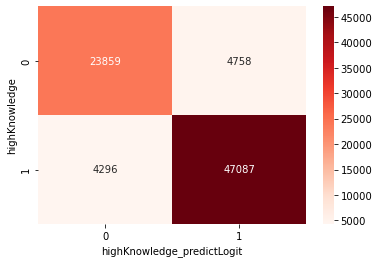

In [40]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

# drRatings = pd.concat([drRatings,TFIDF],axis=1)
ycol = 'highKnowledge'
x = drRatings[xcols]
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF.values],axis=1)
y = drRatings[ycol]

logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()

drRatings['highKnowledge_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highKnowledge'],y_pred=drRatings['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highKnowledge'],y_pred=drRatings['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit") 
plt.ylabel("highKnowledge") 




---


---


**prediction on testing data (out of sample prediction)**

In [41]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highKnowledge'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF.values],axis=1)
y = drRatings[ycol]


x_train=x[:10000]
x_test=x[10000:]
y_train=y[:10000]
y_test=y[10000:]
drRatings=drRatings.reset_index(drop=True)
drRatings_train=drRatings.loc[:9999]
drRatings_train=drRatings_train.reset_index(drop=True)
drRatings_test=drRatings.loc[10000:]
drRatings_test=drRatings_test.reset_index(drop=True)

logit_model1 = sm.Logit(y_train, x_train)
logit_result = logit_model1.fit()



Optimization terminated successfully.
         Current function value: 0.275461
         Iterations 9


prediction accuracy is 0.8933


Text(33.0, 0.5, 'highKnowledge')

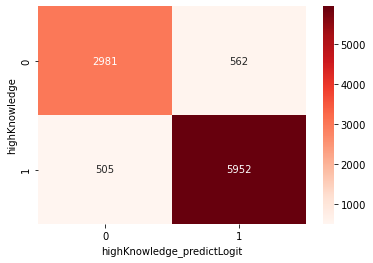

In [42]:
drRatings_train['highKnowledge_predictLogit'] = (logit_result.predict(x_train) >= 0.5).astype(int).tolist()
acc=metrics.accuracy_score(y_true=drRatings_train['highKnowledge'],y_pred=drRatings_train['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings_train['highKnowledge'],y_pred=drRatings_train['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit") 
plt.ylabel("highKnowledge") 

prediction accuracy is 0.8776


Text(33.0, 0.5, 'highKnowledge')

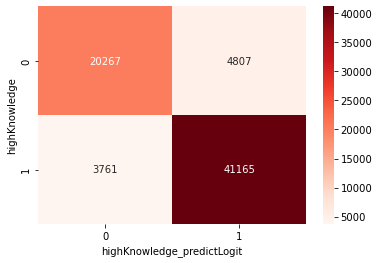

In [43]:
drRatings_test['highKnowledge_predictLogit'] = (logit_result.predict(x_test) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings_test['highKnowledge'],y_pred=drRatings_test['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings_test['highKnowledge'],y_pred=drRatings_test['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit")
plt.ylabel("highKnowledge")

In [44]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import seaborn as sn
drRatings = pd.read_excel('/Users/navneetkaurtirth/Desktop/Social Media Analytics/Assignment 1/OBGYN_new_train_80000.xlsx')
#shuffle the data so that they are in random sequence
drRatings = drRatings.sample(frac=1)
drRatings['highKnowledge'] = (drRatings['knowledge']>4).astype(int)


In [45]:
testingdata = pd.read_excel('/Users/navneetkaurtirth/Desktop/Social Media Analytics/Assignment 1/OBGYN_new_test_withoutAnswer_20000.xlsx')

In [46]:
temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
del temp
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['hour']=drRatings['postedTime'].dt.hour


In [47]:
temp = pd.get_dummies(testingdata['state'])
testingdata = pd.concat([testingdata,temp],axis=1)
del temp
states=drRatings['state'].unique().tolist()
for state in states:
  if state not in testingdata.columns.tolist():
    testingdata[state]=[0]*testingdata.shape[0]
testingdata['postedTime']=pd.to_datetime(testingdata['postedTime'])
testingdata['year']=testingdata['postedTime'].dt.year
testingdata['hour']=testingdata['postedTime'].dt.hour


In [48]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["dr", "doctor"] + list(stop_words)

def calTFIDF(texts,max_features=None):
  vectorizer = TfidfVectorizer(max_features=max_features,lowercase=True,stop_words=stop_words,ngram_range=(1,1))
  TFIDF = vectorizer.fit_transform(texts)
  TFIDF=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names())
  return(TFIDF)


In [50]:
drRatings['text'] = drRatings['review'].apply(lambda x:preprocess(x))
testingdata['text'] = testingdata['review'].apply(lambda x:preprocess(x))

In [51]:
alltext=drRatings['text'].tolist()+testingdata['text'].tolist()

In [52]:
TFIDF=calTFIDF(alltext,max_features=250)
TFIDF.columns = ['tfidf_'+x for x in TFIDF.columns]
TFIDF_train = TFIDF[:80000]
TFIDF_test = TFIDF[80000:]
TFIDF_test=TFIDF_test.reset_index(drop=True)
TFIDF

/Users/navneetkaurtirth/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf_able,tfidf_absolutely,tfidf_actually,tfidf_ago,tfidf_amazing,tfidf_answer,tfidf_answered,tfidf_answers,tfidf_appointment,tfidf_appointments,...,tfidf_woman,tfidf_women,tfidf_wonderful,tfidf_work,tfidf_worst,tfidf_worth,tfidf_wouldnt,tfidf_wrong,tfidf_year,tfidf_years
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.295307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.29003,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.254768,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highKnowledge'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF_train.values],axis=1)
y = drRatings[ycol]


logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()


Optimization terminated successfully.
         Current function value: 0.289091
         Iterations 8


prediction accuracy is 0.8868875


Text(33.0, 0.5, 'highKnowledge')

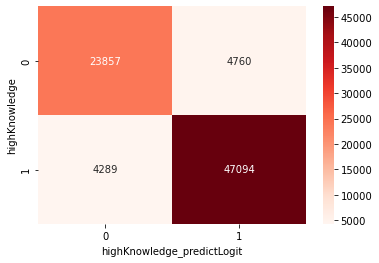

In [54]:
drRatings['highKnowledge_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highKnowledge'],y_pred=drRatings['highKnowledge_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highKnowledge'],y_pred=drRatings['highKnowledge_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highKnowledge_predictLogit") 
plt.ylabel("highKnowledge") 

In [55]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

x = testingdata[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF_test.values],axis=1)


pred = (logit_result.predict(x) >= 0.5).astype(int)
pred_prob = logit_result.predict(x)

In [56]:
print(pred)
print(pred_prob)

[1 1 1 ... 1 1 1]
[0.86632072 0.97598459 0.95256883 ... 0.99819983 0.86573551 0.95859737]


In [57]:
submitcsv=pd.DataFrame()
submitcsv['reviewID']=testingdata['reviewID'].tolist()
submitcsv['prediction']=pred
submitcsv.to_csv('submission.csv',index=False)
print(submitcsv)

       reviewID  prediction
0         80001           1
1         80002           1
2         80003           1
3         80004           1
4         80005           1
...         ...         ...
19995     99996           1
19996     99997           1
19997     99998           1
19998     99999           1
19999    100000           1

[20000 rows x 2 columns]
